Its working fine for snr vs mse

Channel coefficients are changing for each iteration
but are repeating for each SNR

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
no_of_sources=5
threshold_prob=0.9999
threshold_prob_range= np.linspace(0.1, 0.99,100)

change random seed below

In [75]:
def source1(no_of_users)->np.ndarray:
    rnd_seed=19
    np.random.seed(rnd_seed)
    return np.random.uniform(-1, 1, (no_of_users))

In [76]:
def pre_process(msg,cha_coeff1,power:float)->np.ndarray:
    # print("\t\tx=",msg)
    # print("\t\th=",cha_coeff1)
    cha_coeff=np.array(cha_coeff1)
    # print("\t\troot(p)=",np.sqrt(power),"\n\t\t1/h=",1/cha_coeff)
    b=np.minimum(1 / (cha_coeff),np.sqrt(power))
    # print("\t\tb=",b)
    return msg*b


In [77]:
def awgn_mac_with_channel_coeff(symbols, snr_db,channel_coeff)->np.ndarray:
    # print("\t\txb=",symbols)
    faded_symbols=symbols*channel_coeff# This corresponds to y = x_i * h_i
    # print("\t\txbh:",faded_symbols)
    combined_faded_symbols = np.sum(faded_symbols)# This corresponds to y = ∑x_i * h_i
    signal_power = np.mean(np.abs(combined_faded_symbols)**2)  # Signal power calculation
    snr_linear = 10**(snr_db / 10.0)
    noise_variance = signal_power / (2 * snr_linear)
    noise =np.sqrt(noise_variance) * np.random.randn()# Noise generation
    # print("\t\tn=",noise)
    return combined_faded_symbols + noise

In [78]:
def demod(received_signal,cha_coeff,power:float)->np.ndarray:
    # print("\t\tr=",received_signal)
    b=np.minimum(1 / (cha_coeff),np.sqrt(power))
    a_opt=( np.sum(b*cha_coeff) )   /  ( (np.sum((b*cha_coeff)**2)) + (1) )
    return received_signal*a_opt

input parmaeters

In [79]:
snr=20
snr_range=np.arange(0,snr+1,5)

available_power=0.004

no_of_slots=4
slots_range=np.arange(1,no_of_slots+1)
iterations=2

In below msg is same for all iterations and for different snr values too

Channel coeffients are different for each iteration but same for different snr 

It is giving good results as expected

In [80]:
mse=[]
for snr in snr_range: 
    channel_threshold=np.sqrt( 2*np.log(  (1/ (1-(1-threshold_prob )**(1/no_of_slots))  )  ) )
    print("parameter::",snr,"|","chan threshold",channel_threshold,"|","power",available_power)
    
    
    error=[]
    for j in range(iterations):
        print("\033[1m iter ",j+1,"\033[0m")
        source=source1(no_of_sources)
        # print("main source:",source)
        # source=source_main.copy()
        recovered=np.array([])
        
        np.random.seed(j)
        for i in slots_range:
            if i<len(slots_range):
                print(f"\tslot {i}")
                channel_coeff=np.random.randn(len(source))
                print("\tcha coeff=",channel_coeff,"\n")
                
                eligible_msgs=source[np.abs(channel_coeff)>channel_threshold]
                
                non_transmitted=source[np.abs(channel_coeff)<=channel_threshold]
                
                channel_gains=channel_coeff[np.abs(channel_coeff)>channel_threshold]
                
                transmitted=pre_process(eligible_msgs,channel_gains,available_power)
                received= awgn_mac_with_channel_coeff(transmitted, snr,channel_gains)
                
                demod_signal=demod(received,channel_gains,available_power)
                recovered=np.append(recovered,demod_signal)
                # print("\t\tr`=",demod_signal)
                source=non_transmitted
                # print("---------------------------------------------")           
            
            # Check if it's the last slot
            if i == len(slots_range):
                print(f"\tslot {i}")
                channel_gains=np.random.randn(len(non_transmitted))
                transmitted=pre_process(non_transmitted,channel_gains,available_power)
                
                received= awgn_mac_with_channel_coeff(transmitted, snr,channel_gains)
                demod_signal=demod(received,channel_gains,available_power)
                recovered=np.append(recovered,demod_signal)
                # print("\t\tr`=",demod_signal)
                # print("---------------------------------------------")
        # print("recovered",recovered)
        error.append(np.mean((source.sum() - recovered) ** 2))
    mse.append(np.mean(error))

parameter:: 0 | chan threshold 0.4590436050264139 | power 0.004
 iter  1 
	slot 1
	cha coeff= [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799] 

	slot 2
	cha coeff= [0.95008842] 

	slot 3
	cha coeff= [] 

	slot 4
 iter  2 
	slot 1
	cha coeff= [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763] 

	slot 2
	cha coeff= [] 

	slot 3
	cha coeff= [] 

	slot 4
parameter:: 5 | chan threshold 0.4590436050264139 | power 0.004
 iter  1 
	slot 1
	cha coeff= [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799] 

	slot 2
	cha coeff= [0.95008842] 

	slot 3
	cha coeff= [] 

	slot 4
 iter  2 
	slot 1
	cha coeff= [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763] 

	slot 2
	cha coeff= [] 

	slot 3
	cha coeff= [] 

	slot 4
parameter:: 10 | chan threshold 0.4590436050264139 | power 0.004
 iter  1 
	slot 1
	cha coeff= [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799] 

	slot 2
	cha coeff= [0.95008842] 

	slot 3
	cha coeff= [] 

	slot 4
 iter  2 
	slot 1
	cha coeff= [ 

snr: [ 0  5 10 15 20]
mse: [0.35333261773885594, 0.18833540237211893, 0.11820912935431156, 0.08593946847935204, 0.07005875259190826]


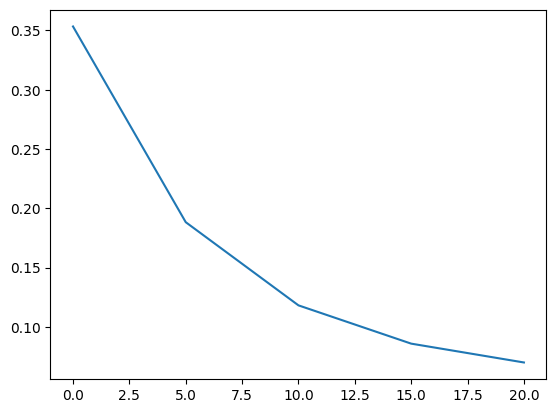

In [81]:
print("snr:",snr_range)
print("mse:",mse)
plt.plot(snr_range,mse)
plt.show()